# Finance Data Capstone Project 

In this project I focus on exploratory data analysis and working with the pandas framework. The goal of this project is to demonstrate my expertise with EDA and working in various ways with dataframes. Tested knowledge of the *pandas* library is a very powerful skill for a data scientist. It serves as the foundation for future complexities. 
____
I focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

The data is already downloaded in a large dataset for us. I will read it in and load my desired libraries so I can take a look. 

### The Imports

I import the typical data science libraries.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

I will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**A pickle file was provided with the data so I simply read that in. This was supplied by Udemy!
  I then splice the specific data for each bank.**

In [7]:
df = pd.read_pickle('all_banks')
BAC = df['BAC']
JPM = df['JPM']
WFC = df['WFC']
GS = df['GS']
C = df['C']
MS = df['MS']


**Creating a list of tickers**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**I then concatenate the various splices into one large dataframe. I do this to avoid making direct changes to the pickle file. I can also specify my keys as the *ticker* list**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks

BAC                                      C                  \
Stock Info   Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                       
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06  46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09  46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...           ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24  17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28  17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29  17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30  17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31  17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

                              ...     MS                                  WFC  \
Stock Info   Close    Volume  ...   Open   High    Low  Close   Volume   Open   
Date                          ...                                               
2006-01-03  492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04  483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05  486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06  486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09  483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68   
...            ...       ...  ...    ...    ...    ...    ...      ...    ...   
2015-12-24   52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163  54.97   
2015-12-28   52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280  54.55   
2015-12-29   52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244  55.11   
2015-12-30   52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162  55.27   
2015-12-31   51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307  54.51   

                                           
Stock Info   High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  
2006-01-06  31.78  31.38  31.68   8403800  
2006-01-09  31.82  31.56  31.68   5619600  
...           ...    ...    ...       ...  
2015-12-24  55.09  54.71  54.82   4999417  
2015-12-28  54.78  54.17  54.68   8288841  
2015-12-29  55.35  54.99  55.29   7894876  
2015-12-30  55.31  54.79  54.89   8016893  
2015-12-31  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

**Setting my column names**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head to make sure the dataframe is built properly**

In [11]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Throughout this project I use .xs() to quickly show me the info I want. The ability to pull a cross-section on specific data is very useful. I can specify my key and level without digging too deep.

**What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Creating a new empty DataFrame called returns. I define returns as the equation below:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

**I call the pct.change() method on the Close column to create the return column values. I build a for loop to go through each Bank Ticker, create a return column, then add it as a column in the *returns* dataframe.**

In [15]:
for tick in tickers: 
    returns[tick + ' return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**I use seaborn to create a pairplot. This can show us a lot of data at once. From a quick look I can see that Citigroup seems to be acting strange**

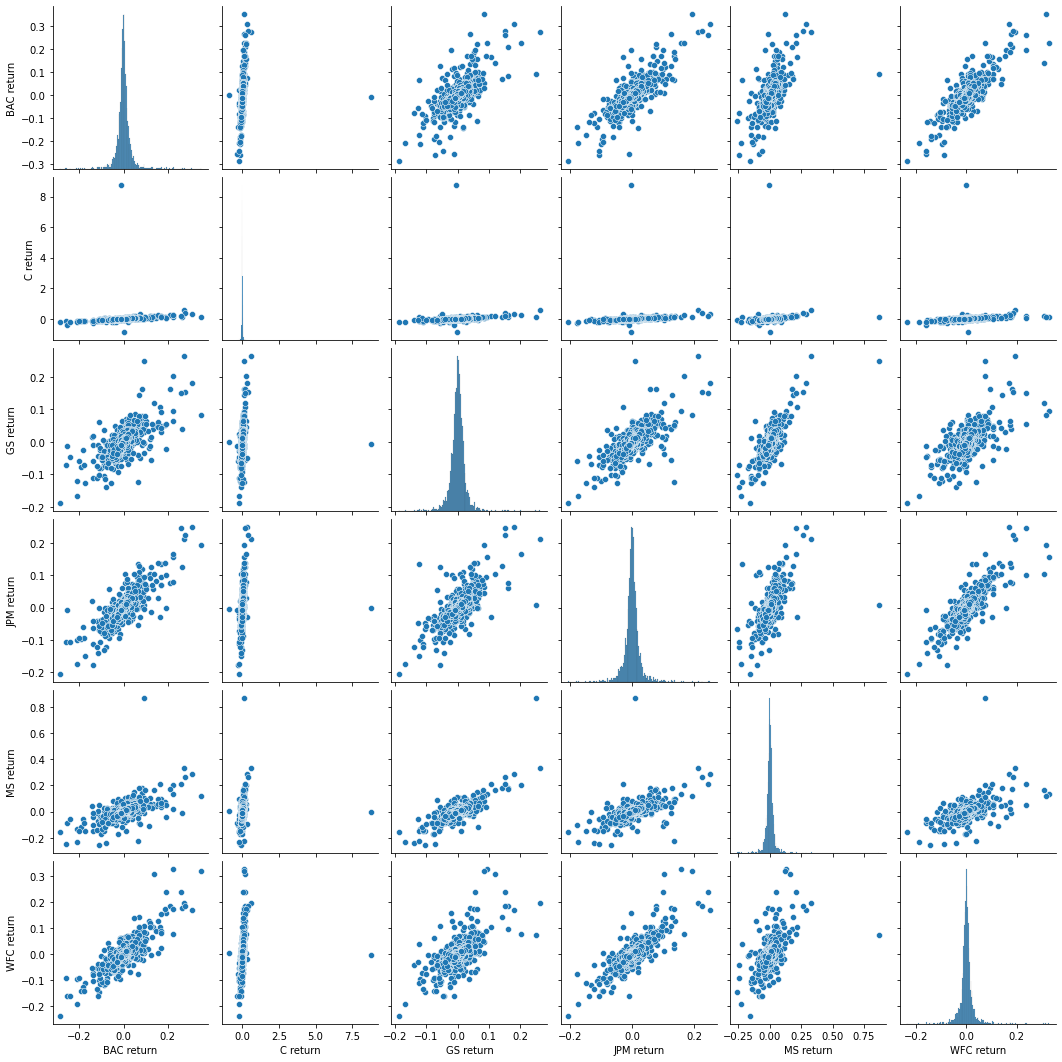

In [20]:
sns.pairplot(returns[1:])

**Using the returns DataFrame, I try to see which date had the worst return for the banks**

In [16]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

**Citigroup's worst and best date seem to be very close to eachother. I learn this from pulling this insight from the data. It turns out, Citigroup had their worst day but then split their stock a few days later**

In [17]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

* See Solution for details

**The standard deviation tells us the possible variance of the values in relation to the mean. This would mean a higher SD has more variance (higher chance of being different from the mean). This would equate to risk! I look to see which stock seems the most riskiest overall and which is most riskiest in 2015**

In [18]:
returns.std()
#Citigroup is the riskiest with a 0.1799 std, more varability than the other stocks

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

In [19]:
returns.loc['2015-01-01':'2015-12-31'].std()
#BAC or MS have riskiest stocks during 2015 

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

**I create a distribution plot using seaborn of the 2015 returns for Morgan Stanley**

C:\Users\shaki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS return', ylabel='Density'>

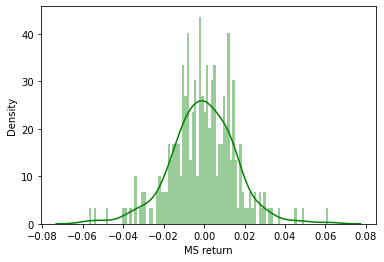

In [20]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS return'], color = 'green', bins = 100)

**I create a distribution plot using seaborn of the 2008 returns for CitiGroup**

C:\Users\shaki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C return', ylabel='Density'>

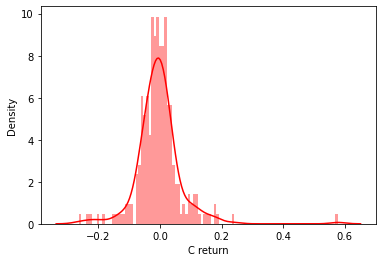

In [21]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C return'], color = 'red', bins=100)

____
# More Visualization

**I do more visualizations, in particular working with the cufflinks library from some interactive plots.**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**I create a line plot showing Close price for each bank for the entire index of time. I pull this cross-section of Close using .xs()**

In [23]:
returnClose = bank_stocks.xs(key='Close',axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

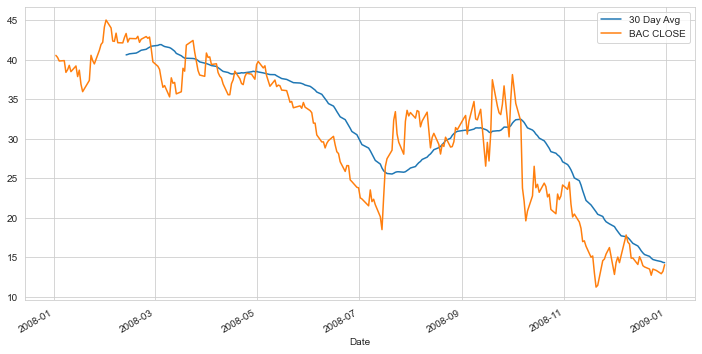

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

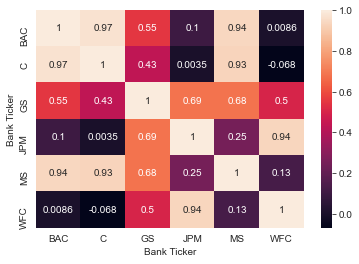

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(), annot=True)

**Using seaborn's clustermap to cluster the correlations together**

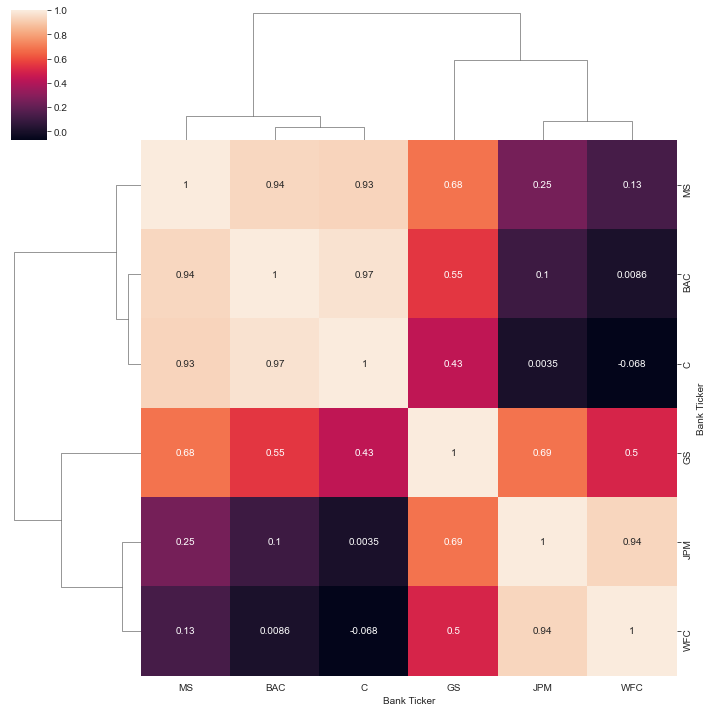

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(), annot=True)

# Part 2 

I experiment with the cufflinks library to create some interesting graphs. It is a very powerful tool that can make great use of user interaction.

**Creating a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [27]:
BAC[['Open','Close','High','Low']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [28]:
MS[['Open','Close','High','Low']]['2015-01-01':'2015-12-31'].rolling(window=30).mean().ta_plot(study='sma')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

We can see our lines don't over/under estimate any points as does a SMA. The Bollinger Band is based on SD so they adjust to volatility quite well 

In [29]:
BAC[['Open','Close','High','Low']]['2015-01-01':'2015-12-31'].ta_plot(study='boll')